In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [2]:
# set the random state same
np.random.seed(0)

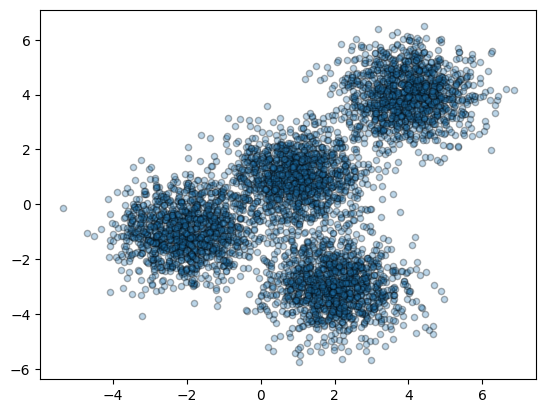

In [3]:
# using make_blobs class to generate datasets
X, y = make_blobs(n_samples=5000, centers=[[4,4],[-2,-1],[2,-3],[1,1]], cluster_std=0.9)
plt.scatter(X[:,0], X[:,1], marker='.', alpha=0.3, edgecolors='k', s=80)

In [4]:
# k-means++ optimize the initial cluster center
# n_clusters is number of clusters we want
# n_init is the number of independent iterations the algorithm runs to initilize the centroid and uses the best centroid out of all
k_means = KMeans(init='k-means++', n_clusters=4, n_init=12)

In [5]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [6]:
# which cluster (0, 1, 2, 3) the data point belongs to
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], shape=(5000,), dtype=int32)

In [7]:
# centers of the 4 clusters
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

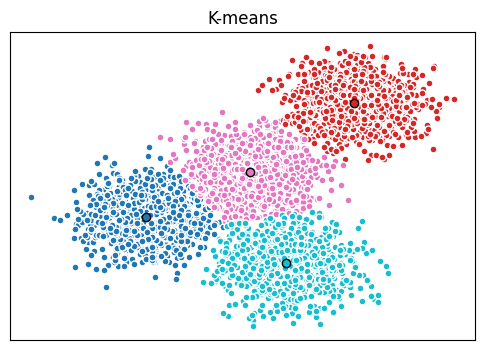

In [23]:
# initialize the plot with specific dimension
fig = plt.figure(figsize=(6,4))

# using colormap module plt.cm.tab10 which has 10 different colors to choose from
# it takes values from 0 to 1.
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

# create a subplot
ax = fig.add_subplot(1, 1, 1)

# creates cluster_id and color
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):
    # create a boolean_mask for each cluster when loop runs
    my_members = (k_means_labels == k)

    # get the cluster center of the specific cluster
    cluster_center = k_means_cluster_centers[k]

    # X[my_members, 0] in numpy gets all the true values using the boolean_mask and 
    # 0 gives us the first item in the array i.e. x-coordinate of the array
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.', ms=10)

    # plotting the cluster centeroids
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', ms=6)

    ax.set_title('K-means')

    # remove x, y ticks
    ax.set_xticks(())
    ax.set_yticks(())